# Report: Relationship between climate change and population change in US states from 2010-2019

### Name: Muhammad Zain Asif
### Student registration no.: 23131067

## Introduction

This project explores how the number of people in U.S. states connects with the average temperatures from 2010 to 2019. I want to understand the patterns that might show up when looking at both state populations and the weather during this time.

### Motivation

I'm curious about this because knowing how many people live in a place and how hot or cold it gets can help make better plans. For instance, if more people move somewhere, it might affect things like resources and services. Also, the weather can impact things like farming and health. By figuring out how these two things relate, I hope to provide useful insights for leaders and communities to plan for the future. This research aims to be a helpful guide for dealing with changes in how many people live in a state and how the weather behaves.

### Goals

<b>identify Trends</b>: Look at the information to see if there are any repeating patterns in how many people live in a state and how hot or cold it gets.

<b>Regional Variances</b>: See if some parts of the U.S. have different patterns in how many people live there and how the weather behaves.

<b>Informative Visualizations</b>: Make pictures like graphs and charts to show the information in a way that's easy for everyone to understand.

## Methods

### Datasources

<b>Datasource 1:</b> Climate change in the contiguous United States

             Link: https://github.com/washingtonpost/data-2C-beyond-the-limit-usa/tree/main
             Provides data of United States average temperature in Celsius over the years


<b>Datasource 2:</b> State Population Totals and Components of Change: 2010-2019

             Link: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
             Provides data of United States population over the years
             
### Data Transformation

All the Data Transformation takes place in the pipline.py file

<b>Cleaning Datasource 1</b>
- Merged climate data from two datasets for US states.
- First dataset provides FIPS codes (state keys), and the second dataset offers detailed climate data.
- Selects FIPS codes and state names from the first dataset.
- Filters and merges data based on FIPS codes for the years 2010-2019.
- Creates a unified DataFrame (`state_climate`) for cohesive analysis with population data.
- Drops redundant columns and selects key features ('State', 'year', 'Temperature in Celsius').
- Renames columns for clarity and relevance.
- Pivots the table for consistent structure: states as rows, years as columns, and temperatures as values.
- Returns a transformed `state_climate` DataFrame

<b>Cleaning Datasource 2</b>
- Renames the 'Unnamed: 0' column in the `state_population` DataFrame to 'State' for clarity.
- Removes unnecessary columns (index-related) from `state_population`.
- Strips extraneous characters (e.g., '.') from the 'State' column for consistency.
- Filters `state_population` to include only states present in `state_climate`.
- Returns a refined `state_population` DataFrame, aligning it with the structure of `state_climate` for seamless integration and analysis.

<b> Merging and Storing Data</b>
- Utilizes `pd.merge` to combine `state_population` and `state_climate` DataFrames based on the 'State' column.
- Appends suffixes ('_pop' and '_climate') to distinguish overlapping column names.
- Produces a merged DataFrame (`merged_data`) containing both population and climate information for analysis.
- Establishes a data storage pipeline for a DataFrame (`df`) to be stored in an SQLite database.
- Dynamically creates a 'data' folder if it doesn't exist, ensuring an organized structure.
- Defines the path for the SQLite database (`pop_climate.sqlite`) within the 'data' folder.
- Utilizes SQLAlchemy's `create_engine` to connect to the SQLite database.
- Stores the DataFrame in the SQLite database under the specified `table_name`.
- If the table already exists, it is replaced ('if_exists='replace''), ensuring up-to-date data storage.

## Analysis

### Import Modules

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from sqlalchemy import create_engine
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Load Data

In [2]:
current_directory = os.getcwd()
data_folder_path = os.path.join(os.path.abspath(os.path.join(current_directory, os.pardir)), 'data')
db_path = os.path.join(data_folder_path, 'pop_climate.sqlite')
engine = create_engine(f'sqlite:///{db_path}')
conn = engine.connect()

In [3]:
df1 = pd.read_sql_table('state_climate', conn, index_col='State') # Climate Data
df2 = pd.read_sql_table('state_population', conn, index_col='State') # Population Data
df = pd.read_sql_table('state_population_climate', conn, index_col='State') # Combined Data
df.reset_index(inplace=True)

In [4]:
df1.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
Alabama,17.060185,17.685185,18.287037,17.000000,16.685185,18.120370,18.523148,18.351852,18.027778,18.541667
Arizona,15.773148,15.740741,16.726852,15.805556,16.805556,16.527778,16.763889,17.240741,16.814815,15.712963
Arkansas,16.208333,16.564815,17.560185,15.356481,14.814815,16.333333,17.106481,16.967593,16.203704,16.236111
California,14.291667,14.129630,15.282407,15.175926,16.361111,15.976852,15.629630,15.745370,15.625000,14.652778
Colorado,7.861111,7.462963,9.064815,7.273148,7.810185,8.578704,8.490741,8.847222,8.425926,7.365741


In [5]:
df2.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
Colorado,5047349.0,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0


In [6]:
df.head()

,State,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,...,2010_climate,2011_climate,2012_climate,2013_climate,2014_climate,2015_climate,2016_climate,2017_climate,2018_climate,2019_climate
0,Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,...,17.060185,17.685185,18.287037,17.000000,16.685185,18.120370,18.523148,18.351852,18.027778,18.541667
1,Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,...,15.773148,15.740741,16.726852,15.805556,16.805556,16.527778,16.763889,17.240741,16.814815,15.712963
2,Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,...,16.208333,16.564815,17.560185,15.356481,14.814815,16.333333,17.106481,16.967593,16.203704,16.236111
3,California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,...,14.291667,14.129630,15.282407,15.175926,16.361111,15.976852,15.629630,15.745370,15.625000,14.652778
4,Colorado,5047349.0,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,...,7.861111,7.462963,9.064815,7.273148,7.810185,8.578704,8.490741,8.847222,8.425926,7.365741


### Population Growth and Climate Trends Across US States

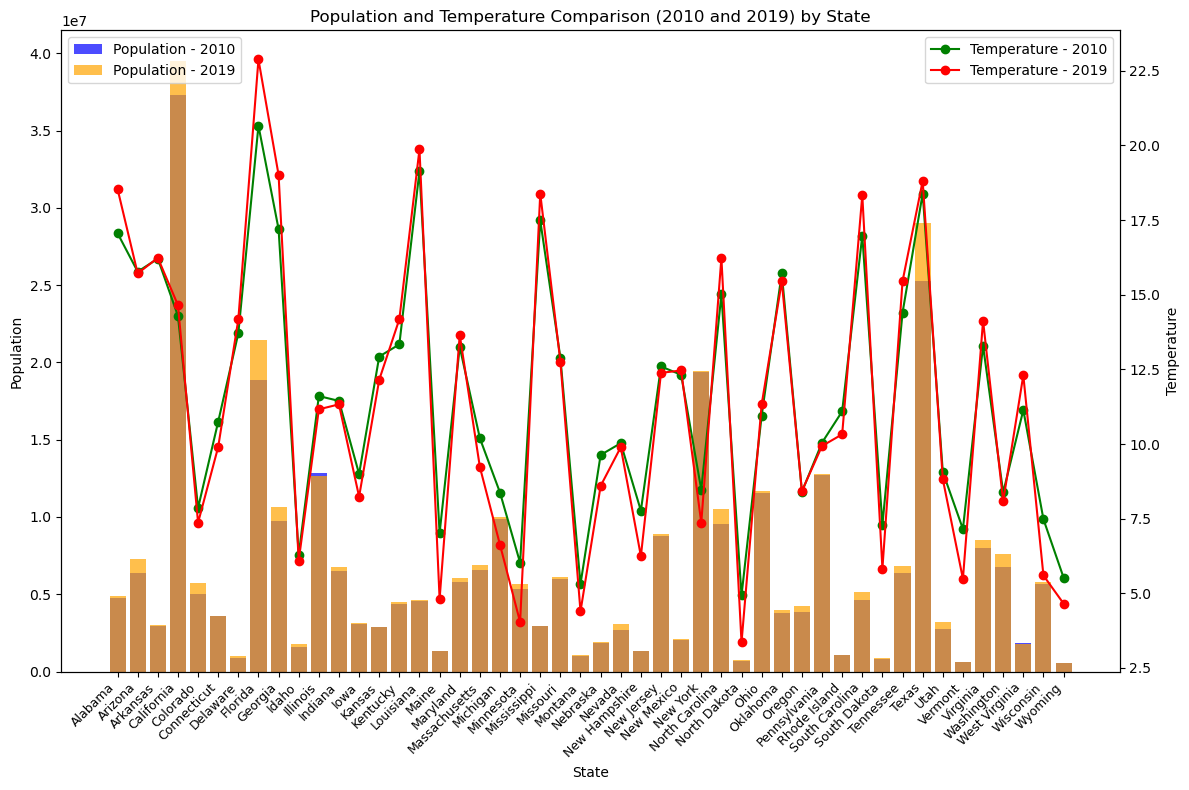

In [10]:
df_2010 = df[['State', '2010_pop', '2010_climate']]
df_2019 = df[['State', '2019_pop', '2019_climate']]
df_2010.set_index('State', inplace=True)
df_2019.set_index('State', inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot population on the first y-axis
ax1.bar(df_2010.index, df_2010['2010_pop'], alpha=0.7, color='blue', label='Population - 2010')
ax1.bar(df_2019.index, df_2019['2019_pop'], alpha=0.7, color='orange', label='Population - 2019')
ax1.set_xlabel('State')
ax1.set_ylabel('Population', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_2010.index, df_2010['2010_climate'], color='green', marker='o', label='Temperature - 2010')
ax2.plot(df_2019.index, df_2019['2019_climate'], color='red', marker='o', label='Temperature - 2019')
ax2.set_ylabel('Temperature', color='black')
ax2.tick_params('y', colors='black')
ax2.legend(loc='upper right')


for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
    tick.set_fontsize(9)

plt.title('Population and Temperature Comparison (2010 and 2019) by State')
plt.tight_layout()
plt.show()

Despite population growth being a common trend, the temperature changes vary widely. States like Florida and Arizona display both increased populations and temperatures, possibly indicating a preference for warmer climates. On the contrary, states like Michigan and New York witness population growth alongside decreasing temperatures, suggesting diverse factors influencing regional demographics and climate preferences

### Comparison of Top 5 growing and decreasing states

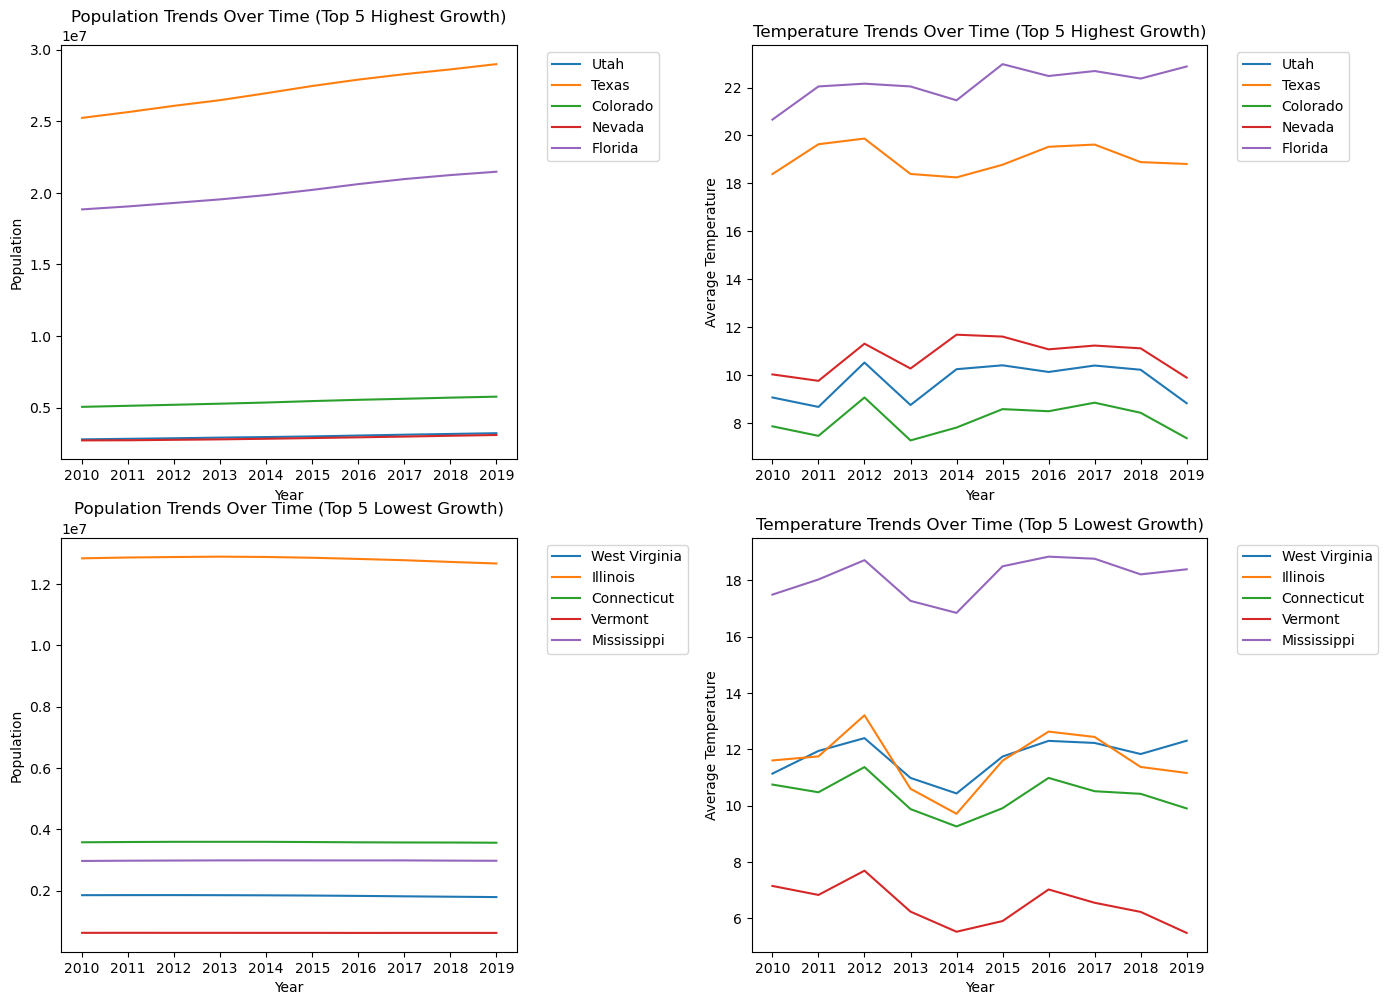

In [7]:
df.reset_index(inplace=True)
df['population_change_percentage'] = ((df['2019_pop'] - df['2010_pop']) / df['2010_pop']) * 100

top5_highest_growth = df.nlargest(5, 'population_change_percentage')
top5_lowest_growth = df.nsmallest(5, 'population_change_percentage')

top5_highest_growth_states = top5_highest_growth['State']
top5_lowest_growth_states = top5_lowest_growth['State']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for state in top5_highest_growth_states:
    population_trend = df.loc[df['State'] == state, ['2010_pop', '2011_pop', '2012_pop', '2013_pop', '2014_pop',
                                                     '2015_pop', '2016_pop', '2017_pop', '2018_pop', '2019_pop']]
    axes[0, 0].plot(population_trend.columns.str.split('_').str[0], population_trend.values.flatten(), label=state)

axes[0, 0].set_title('Population Trends Over Time (Top 5 Highest Growth)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Population')
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot population trends for the top 5 states with the lowest growth
for state in top5_lowest_growth_states:
    population_trend = df.loc[df['State'] == state, ['2010_pop', '2011_pop', '2012_pop', '2013_pop', '2014_pop',
                                                     '2015_pop', '2016_pop', '2017_pop', '2018_pop', '2019_pop']]
    axes[1, 0].plot(population_trend.columns.str.split('_').str[0], population_trend.values.flatten(), label=state)

axes[1, 0].set_title('Population Trends Over Time (Top 5 Lowest Growth)')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Population')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot temperature trends for the top 5 states with the highest growth
for state in top5_highest_growth_states:
    climate_trend = df.loc[df['State'] == state, ['2010_climate', '2011_climate', '2012_climate', '2013_climate',
                                                   '2014_climate', '2015_climate', '2016_climate', '2017_climate',
                                                   '2018_climate', '2019_climate']]
    axes[0, 1].plot(climate_trend.columns.str.split('_').str[0], climate_trend.values.flatten(), label=state)

axes[0, 1].set_title('Temperature Trends Over Time (Top 5 Highest Growth)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Temperature')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot temperature trends for the top 5 states with the lowest growth
for state in top5_lowest_growth_states:
    climate_trend = df.loc[df['State'] == state, ['2010_climate', '2011_climate', '2012_climate', '2013_climate',
                                                   '2014_climate', '2015_climate', '2016_climate', '2017_climate',
                                                   '2018_climate', '2019_climate']]
    axes[1, 1].plot(climate_trend.columns.str.split('_').str[0], climate_trend.values.flatten(), label=state)

axes[1, 1].set_title('Temperature Trends Over Time (Top 5 Lowest Growth)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Temperature')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In states with the highest population growth, like Utah and Texas, we saw different temperature trends. Utah had changing temperatures, while Texas had more stable weather. Colorado's temperature gradually increased, Nevada had ups and downs, and Florida stayed consistently warm.

On the flip side, in states with the lowest population growth, such as West Virginia and Illinois, we noticed diverse temperature patterns. Connecticut, Vermont, and Mississippi also showed unique temperature trends. This suggests that while weather is a factor, it's not the only thing affecting population changes—it's a bit more complicated.

### Correlation between Population change and Climate Change

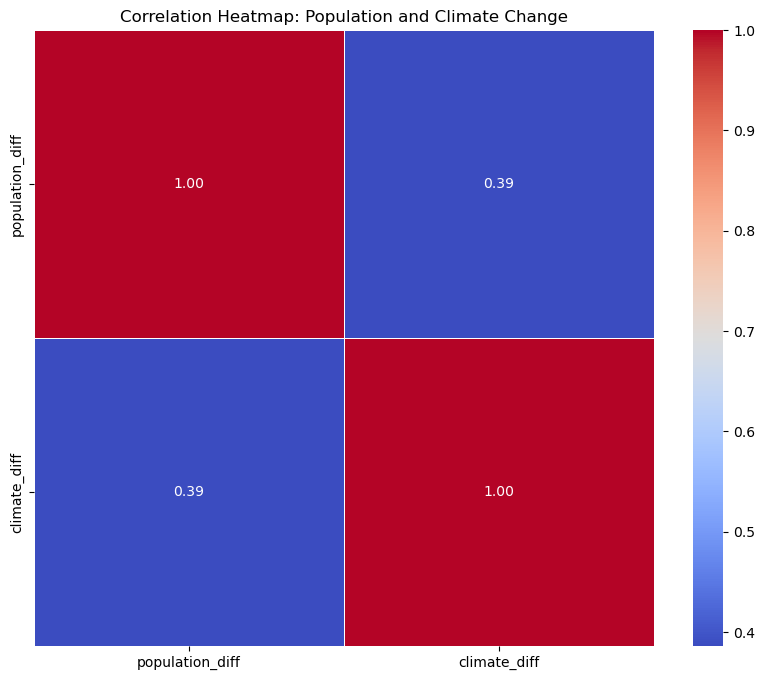

In [14]:
df['population_diff'] = df['2019_pop'] - df['2010_pop']
df['climate_diff'] = df['2019_climate'] - df['2010_climate']

correlation_df = df[['population_diff', 'climate_diff']]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Population and Climate Change')
plt.show()

The correlation matrix reveals a moderate positive correlation (0.39) between state population change and average temperature change from 2010 to 2019. While population and climate differences are positively related, the strength of the correlation suggests other factors may also influence population dynamics over the studied period.

### Scatter plot of Population Change and Climate change

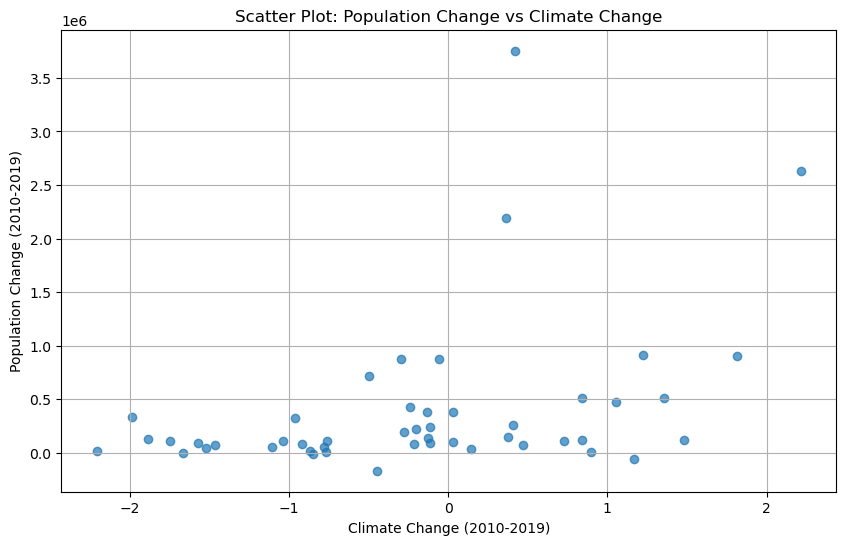

In [15]:
df['population_diff'] = df['2019_pop'] - df['2010_pop']
df['climate_diff'] = df['2019_climate'] - df['2010_climate']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['climate_diff'], df['population_diff'], alpha=0.7)
plt.title('Scatter Plot: Population Change vs Climate Change')
plt.xlabel('Climate Change (2010-2019)')
plt.ylabel('Population Change (2010-2019)')
plt.grid(True)
plt.show()

The scatter plot illustrates that a predominant portion of states experienced population growth ranging from 0 to 500k, coupled with a prevalent range of climate change falling within -1 to 1.

### Choropleth map of Population change and climate change

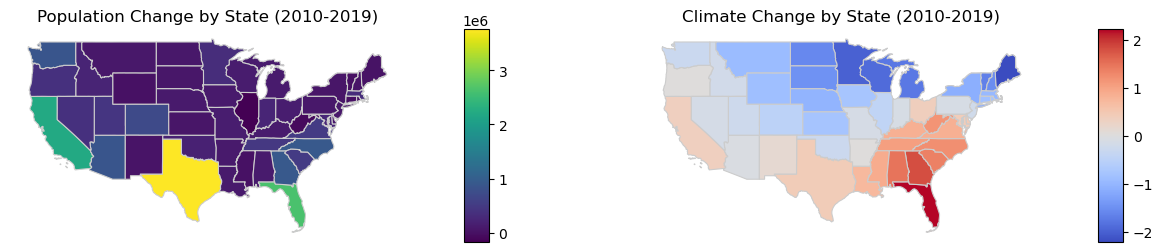

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

tdf = df.copy()
tdf = tdf.rename(columns={'State': 'NAME'})
us_states = gpd.read_file('usa-states-census-2014.shp')



merged_data = us_states.merge(tdf[['NAME', 'population_diff', 'climate_diff']], left_on='NAME', right_on='NAME', how='left')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot population change
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.1)
merged_data.plot(column='population_diff', cmap='viridis', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True, cax=cax1)
ax1.set_title('Population Change by State (2010-2019)')
ax1.set_axis_off()

# Plot climate change
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.1)
merged_data.plot(column='climate_diff', cmap='coolwarm', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True, cax=cax2)
ax2.set_title('Climate Change by State (2010-2019)')
ax2.set_axis_off()

# Show the subplots
plt.show()


## Conclusion


In wrapping up this project, it was found that while population growth is a common trend across U.S. states, the changes in temperature exhibit significant variations. States like Florida and Arizona experience both increased populations and temperatures, potentially indicating a preference for warmer climates. Conversely, states like Michigan and New York show population growth alongside decreasing temperatures, suggesting diverse factors influencing regional demographics and climate preferences.

Examining states with the highest population growth, such as Utah and Texas, we observed different temperature trends. Utah experienced fluctuating temperatures, while Texas had more stable weather. Colorado witnessed a gradual temperature increase, Nevada displayed ups and downs, and Florida maintained consistently warm temperatures.

On the other hand, states with the lowest population growth, such as West Virginia and Illinois, demonstrated diverse temperature patterns. Connecticut, Vermont, and Mississippi also exhibited unique temperature trends. This implies that while weather plays a role, it is not the sole determinant of population changes; the relationship is more intricate.

The correlation matrix uncovered a moderate positive correlation (0.39) between state population change and average temperature change from 2010 to 2019. This suggests that, although population and climate differences are positively related, other factors likely contribute to population dynamics over the studied period. In essence, understanding the interplay between population shifts and weather patterns provides valuable insights for informed planning and decision-making by leaders and communities.